# Visualising Lake Water Level timeseries

<font color='red'>Before continuing with this tutorial, please verify that the C3S API is installed. All the information about this api is available at: </font>

https://cds.climate.copernicus.eu/api-how-to#install-the-cds-api-key


****

In this tutorial we will access lake water level data from the Climate Data Store (CDS) and plot the timeseries. The tutorial comprises two main steps:

1. Dowload and decompress data 
2. Visualise and save water level timeseries
3. Visualise the location of the lake in a map



## Import librairies


The lake water level data will be download in a zip file containing a NetCDF file. We need libraries to download data from the CDS but also libraires to manage zip files (zipfile library) and  NetCDF files (xarray library). We also use libraries to plot and visualise data (matplotlib and cartopy libraries).

Additional libraires: os and glob are used for file management 

In [2]:
import cdsapi
import os
import glob
import zipfile
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs, feature

Current version of the Lake Water Level dataset in CDS (v2.1) contains timeseries from 94 lakes. 

In [3]:
available_lakes = [
    'amadjuak', 'argentino', 'athabasca', 'ayakkum', 'aylmer', 'baikal','baker', 'balbina', 
    'balkhash', 'beysehir', 'bosten', 'bratskoye','cahora_bassa', 'caribou', 'caspian', 'cedar', 
    'chardarya', 'dagze_co','des_bois', 'dogaicoring_q', 'dubawnt','erie', 'fort_peck', 
    'grande_trois','greatslave', 'guri', 'har','hongze', 'hovsgol', 'hulun','huron', 'issykkul', 
    'kainji','kapchagayskoye', 'kara_bogaz_gol', 'kariba','kasba', 'khanka', 'kokonor',
    'krasnoyarskoye', 'kremenchutska', 'kuybyshevskoye','kyoga', 'ladoga', 'lagoa_dos_patos', 
    'langa_co', 'lixiodain_co', 'malawi','manitoba', 'michigan', 'migriggyangzham', 'mossoul', 
    'mweru', 'namco', 'nasser', 'ngangze', 'ngoring_co', 'nicaragua', 'novosibirskoye', 
    'nueltin','onega', 'ontario', 'opinac','peipus', 'rukwa', 'rybinskoye', 'saint_jean', 
    'sakakawea', 'saksak','saratovskoye', 'sarykamish', 'sasykkol','soungari', 'superior', 
    'tana','tanganika', 'tangra_yumco', 'tchad','tchany', 'tharthar', 'todos_los_santos',
    'tsimlyanskoye', 'turkana', 'ulungur','vanerm', 'victoria', 'volta','williston', 
    'winnipeg', 'winnipegosis','yellowstone', 'zeyskoye', 'zhari_namco','ziling'
]

For downloading and generating the timeserie, two inputs are required:

- The name of the lake (lake_name). The name of the lake must exists in the list of available lakes
- The output directory name(output_dir) where the different files will be save.

In [20]:
# the name of the lake
lake_name = "Argentino"

# the output directory name 
DATADIR = './data_dir'
# Create the output directory if required
os.makedirs(DATADIR, exist_ok=True)


A test is performed to verify that the water level for the selected lake is available 

In [21]:
if lake_name.lower() not in available_lakes :
    print (f'The lake "{lake_name}" is not still available')

## Download for data

Having the CDS api, this function will retrive the  data for the selected lake into the defined output directory. The downloaded file is compressed (zip format) containing the data file in NetCDF format. For reading the lake water level data, the file will be extracted in the output directory. 

In [23]:
print(lake_name.lower)
c = cdsapi.Client()
download_zip_file = os.path.join(DATADIR, f'{lake_name}.zip')
if not os.path.isfile(download_zip_file):
    c.retrieve( 
        'satellite-lake-water-level',
        {
            'lake': [lake_name.lower()],
            'variable': 'water_surface_height',
            'format': 'zip' # valid formats: zip, tar and tgz
        },
        download_zip_file
    )

with zipfile.ZipFile(download_zip_file, 'r') as zip_ref:
    filelist = [os.path.join(DATADIR, f) for f in zip_ref.namelist()]
    zip_ref.extractall(DATADIR)

<built-in method lower of str object at 0x13e5cb070>


## Visualise the Lake Water Level timeseries

Now that the data has been extracted, we can read and plot it. To read the data in NetCDF format we use the Xarray library and for the visualisation of the time series we use Matplotlib

The figure with the timeseries will be saved in the output directory in png format in the [lake_name].png file

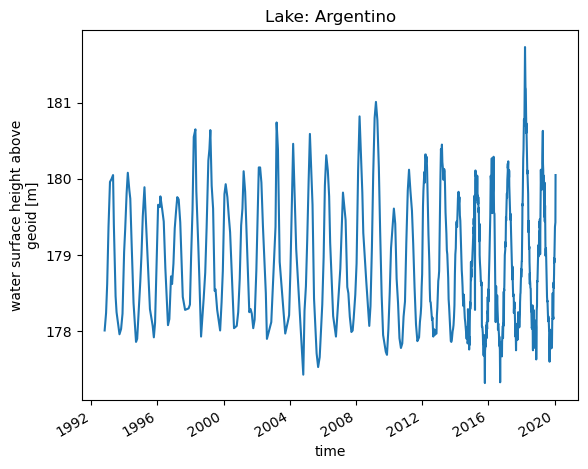

In [25]:
# open the file with Xarray
xr_lake = xr.open_dataset(filelist[0])

# plot and visualise the timeseries
xr_lake.water_surface_height_above_reference_datum.plot()
plt.title(f'Lake: {lake_name.title()}')

# save the figure
png_file = os.path.join(DATADIR, f'{lake_name}_timeseries.png')
plt.savefig(png_file, dpi=500)

 ## Indicate the position of the lake on a map 
 
 For generating this figure we use the cartopy library

-50.33 -72.75


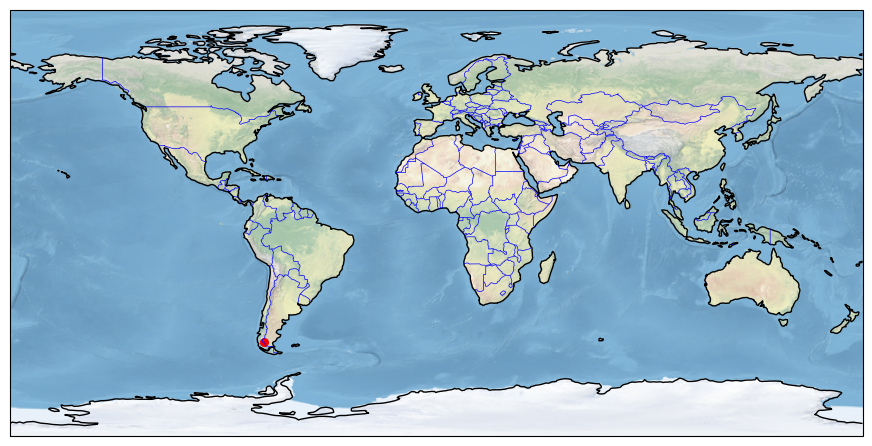

In [26]:
fig = plt.figure(figsize = (11,8.5))
ax = plt.subplot(1,1,1, projection = crs.PlateCarree())

ax.coastlines()
ax.add_feature(feature.BORDERS, linewidth=0.5, edgecolor='blue')
ax.stock_img()

# add lake location 
lat = float(xr_lake.lake_barycentre_latitude.split()[0])
if 'S' in xr_lake.lake_barycentre_latitude:
    lat = -lat
lon = float(xr_lake.lake_barycentre_longitude.split()[0])
if 'W' in xr_lake.lake_barycentre_longitude:
    lon = -lon
    
print (lat, lon)
plt.scatter(x = [lon], y = [lat], s = 30, color = 'red', transform = crs.PlateCarree())